# Formula 1 EDA: 
## Results from championships 1950-2024


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the datasets
circuits = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/circuits.csv')
constructor_results = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/constructor_results.csv')
constructor_standings = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/constructor_standings.csv')
constructors = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/constructors.csv')
driver_standings = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/driver_standings.csv')
drivers = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/drivers.csv')
lap_times = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/lap_times.csv')
pit_stops = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/pit_stops.csv')
qualifying = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/qualifying.csv')
races = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/races.csv')
results = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/results.csv')
seasons = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/seasons.csv')
status = pd.read_csv('/Users/elizakimball/Desktop/Harvard Thesis/kaggleF1/status.csv')

#print(results.describe())
#results
results[results['raceId'] == 1105]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25960,25966,1105,830,9,1,1,1,1,1,26.0,66,1:27:57.940,5277940,61,1,1:16.330,219.641,1
25961,25967,1105,1,131,44,4,2,2,2,18.0,66,+24.090,5302030,62,3,1:16.676,218.649,1
25962,25968,1105,847,131,63,12,3,3,3,15.0,66,+32.389,5310329,48,5,1:17.875,215.283,1
25963,25969,1105,815,9,11,11,4,4,4,12.0,66,+35.812,5313752,52,2,1:16.666,218.678,1
25964,25970,1105,832,6,55,2,5,5,5,10.0,66,+45.698,5323638,60,11,1:18.403,213.833,1
25965,25971,1105,840,117,18,5,6,6,6,8.0,66,+1:03.320,5341260,56,14,1:18.722,212.967,1
25966,25972,1105,4,117,14,8,7,7,7,6.0,66,+1:04.127,5342067,49,7,1:18.083,214.709,1
25967,25973,1105,839,214,31,6,8,8,8,4.0,66,+1:09.242,5347182,54,18,1:18.946,212.362,1
25968,25974,1105,855,51,24,13,9,9,9,2.0,66,+1:11.878,5349818,38,15,1:18.753,212.883,1
25969,25975,1105,842,214,10,10,10,10,10,1.0,66,+1:13.530,5351470,41,10,1:18.375,213.910,1


In [4]:
print(results.dtypes)

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object


## Data Cleaning

In [5]:
# Check for Na values
has_nan = results.isna().any().any()
print("Are there any NaN values in the results DataFrame?", has_nan)
has_nan = constructors.isna().any().any()
print("Are there any NaN values in the constructor DataFrame?", has_nan)
has_nan = drivers.isna().any().any()
print("Are there any NaN values in the driver DataFrame?", has_nan)

Are there any NaN values in the results DataFrame? False
Are there any NaN values in the constructor DataFrame? False
Are there any NaN values in the driver DataFrame? False


In [6]:
results = results[['resultId', 'raceId', 'position', 'driverId', 'constructorId']]

In [7]:
# Merge results with races to get year column into results
if 'year' not in results.columns:
    # Perform the merge if 'year' is not present
    results = results.merge(races[['raceId', 'year']], on='raceId', how='left')
    # Optional: Adjust the column order to place 'year' right after 'raceId'
    cols = list(results.columns)
    race_id_index = cols.index('raceId')
    cols.insert(race_id_index + 1, cols.pop(cols.index('year')))
    results = results[cols]
else:
    # If 'year' is already present, print a message or handle as needed
    print("Column 'year' already exists in the DataFrame.")

# Merge results with races to get year column into results
if 'driverRef' not in results.columns:
    # Perform the merge if 'driverName' is not present
    results = results.merge(drivers[['driverId', 'driverRef']], on='driverId', how='left')
    # Optional: Adjust the column order to place 'driverRef' right after 'driverId'
    cols = list(results.columns)
    driver_id_index = cols.index('driverId')
    cols.insert(driver_id_index + 1, cols.pop(cols.index('driverRef')))
    results = results[cols]
else:
    # If 'year' is already present, print a message or handle as needed
    print("Column 'driverRef' already exists in the DataFrame.")

results

,resultId,raceId,year,position,driverId,driverRef,constructorId
0,1,18,2008,1,1,hamilton,1
1,2,18,2008,2,2,heidfeld,2
2,3,18,2008,3,3,rosberg,3
3,4,18,2008,4,4,alonso,4
4,5,18,2008,5,5,kovalainen,1
...,...,...,...,...,...,...,...
26514,26520,1132,2024,16,839,ocon,214
26515,26521,1132,2024,17,815,perez,9
26516,26522,1132,2024,18,855,zhou,15
26517,26523,1132,2024,\N,847,russell,131


In [8]:
# Data cleaning for positions in results where \\N exists there should be a tie
results['position'] = pd.to_numeric(results['position'], errors='coerce')

filtered_results = results[results['position'].isnull()]

unique_raceId = filtered_results['raceId'].unique()

print(unique_raceId)

for raceId in unique_raceId:
    race_results = results[results['raceId'] == raceId]
    max_value = race_results['position'].max()
    results.loc[(results['raceId'] == raceId) & (results['position'].isnull()), 'position'] = max_value + 1

results[results['raceId'] == 1128]

[  18   19   20 ... 1128 1129 1132]


,resultId,raceId,year,position,driverId,driverRef,constructorId
26419,26425,1128,2024,1.0,844,leclerc,6
26420,26426,1128,2024,2.0,857,piastri,1
26421,26427,1128,2024,3.0,832,sainz,6
26422,26428,1128,2024,4.0,846,norris,1
26423,26429,1128,2024,5.0,847,russell,131
26424,26430,1128,2024,6.0,830,max_verstappen,9
26425,26431,1128,2024,7.0,1,hamilton,131
26426,26432,1128,2024,8.0,852,tsunoda,215
26427,26433,1128,2024,9.0,848,albon,3
26428,26434,1128,2024,10.0,842,gasly,214


In [9]:

# Confirm there are no nan values in results
filtered_results = results[results['position'].isnull()]
filtered_results

,resultId,raceId,year,position,driverId,driverRef,constructorId


## Fix constructor name changes

In [10]:
# Constructors
unique_constructors = constructors['name'].unique()
print("Unique Constructors:", unique_constructors)
print("length of unique constructors:", len(unique_constructors))

Unique Constructors: ['McLaren' 'BMW Sauber' 'Williams' 'Renault' 'Toro Rosso' 'Ferrari'
 'Toyota' 'Super Aguri' 'Red Bull' 'Force India' 'Honda' 'Spyker' 'MF1'
 'Spyker MF1' 'Sauber' 'BAR' 'Jordan' 'Minardi' 'Jaguar' 'Prost' 'Arrows'
 'Benetton' 'Brawn' 'Stewart' 'Tyrrell' 'Lola' 'Ligier' 'Forti' 'Footwork'
 'Pacific' 'Simtek' 'Team Lotus' 'Larrousse' 'Brabham' 'Dallara'
 'Fondmetal' 'March' 'Andrea Moda' 'AGS' 'Lambo' 'Leyton House' 'Coloni'
 'Euro Brun' 'Osella' 'Onyx' 'Life' 'Rial' 'Zakspeed' 'RAM' 'Alfa Romeo'
 'Spirit' 'Toleman' 'ATS' 'Theodore' 'Fittipaldi' 'Ensign' 'Shadow' 'Wolf'
 'Merzario' 'Kauhsen' 'Rebaque' 'Surtees' 'Hesketh' 'Martini' 'BRM'
 'Penske' 'LEC' 'McGuire' 'Boro' 'Apollon' 'Kojima' 'Parnelli' 'Maki'
 'Embassy Hill' 'Lyncar' 'Trojan' 'Amon' 'Token' 'Iso Marlboro' 'Tecno'
 'Matra' 'Politoys' 'Connew' 'Bellasi' 'De Tomaso' 'Cooper' 'Eagle' 'LDS'
 'Protos' 'Shannon' 'Scirocco' 'RE' 'BRP' 'Porsche' 'Derrington' 'Gilby'
 'Stebro' 'Emeryson' 'ENB' 'JBW' 'Ferguson' 'MB

In [11]:
# make sure races had examples from all years
for year in range(1950, 2025):
    if year not in races["year"].unique():
        print(f"{year} is not in the list")

In [12]:
# Merge results with constructors to get constructorRef into results
if 'constructorRef' not in results.columns:
    # Perform the merge if 'constructorRef' is not present
    results = results.merge(constructors[['constructorId', 'constructorRef']], on='constructorId', how='left')
    # Optional: Adjust the column order to place 'constructorRef' right after 'constructorId'
    cols = list(results.columns)
    constructor_id_index = cols.index('constructorId')
    cols.insert(constructor_id_index + 1, cols.pop(cols.index('constructorRef')))
    results = results[cols]
else:
    # If 'constructorRef' is already present, print a message or handle as needed
    print("Column 'constructorRef' already exists in the DataFrame.")


In [13]:
# Account for constructor name changes

#red_bull_results = results[results['constructorRef'] == 'red_bull']
#print(red_bull_results.drop_duplicates())

#print(results['constructorRef'].unique())
team_mapping_name_change = {
    "red_bull" : ["stewart", 'jaguar'],
    'mercedes' : ["tyrrell", 'bar', 'honda', 'brawn'],
    'ferrari' : [],
    'mclaren' : [],
    'aston_martin' : ["jordan", "midland", "spyker", "force_india", "racing_point"],
    'alpine' : ['toleman', 'benetton', 'renault', 'lotus_f1'],
    'williams': [],
    'rb' : ['minardi', 'toro_rosso', 'alphatauri'],
    'sauber' : ['bmw_sauber', 'alfa'],
    'haas' : []
}

reverse_mapping = {old_name: new_name for new_name, old_list in team_mapping_name_change.items() for old_name in old_list}

results['constructorRecent'] = results['constructorRef'].map(reverse_mapping).fillna(results['constructorRef'])
results[['constructorRecent']].drop_duplicates()

,constructorRecent
0,mclaren
1,sauber
2,williams
3,alpine
6,rb
...,...
20339,virgin
21242,marussia
21246,caterham
22566,manor


In [14]:
results['constructorRecent'] = results['constructorRecent'].str.split('-').str[0]

results[results['constructorRecent'] == 'mclaren-brm']

,resultId,raceId,year,position,driverId,driverRef,constructorId,constructorRef,constructorRecent


In [15]:
# Consider teams as they change their engine
hyphenated_entries = results[results['constructorRecent'].str.contains('-', na=False)]['constructorRecent'].unique()
hyphenated_entries = sorted(hyphenated_entries)
print(hyphenated_entries)

'''
FINDINGS:
Brabham has 5 variants. 
Cooper has 10 variants. 
De Tomaso has 3 variants. 
Eagle has 2 variants. 
Lds has 2 variants. 
Lotus has 6 variants. 
March has 2 variants. 
Mclaren has 4 varaints.
Shadow has 2 variants. 

These variant counts do not consider the names without hyphen. For example, "Mclaren" is not counted above.
In order to access if these need to be considered different teams, graphs for Brabham, Cooper, Lotus, and Mclaren will be looked at. 

'''

[]


'\nFINDINGS:\nBrabham has 5 variants. \nCooper has 10 variants. \nDe Tomaso has 3 variants. \nEagle has 2 variants. \nLds has 2 variants. \nLotus has 6 variants. \nMarch has 2 variants. \nMclaren has 4 varaints.\nShadow has 2 variants. \n\nThese variant counts do not consider the names without hyphen. For example, "Mclaren" is not counted above.\nIn order to access if these need to be considered different teams, graphs for Brabham, Cooper, Lotus, and Mclaren will be looked at. \n\n'

In [16]:
# Create dataframes for Brabham, Cooper, Lotus, and Mclaren

unique_values = results['constructorRecent'].unique()

brabham_values = [value for value in unique_values if str(value).startswith('brabham')]
brabham_results = results[results['constructorRecent'].isin(brabham_values)]

cooper_values = [value for value in unique_values if str(value).startswith('cooper')]
cooper_results = results[results['constructorRecent'].isin(cooper_values)]

lotus_values = [value for value in unique_values if str(value).startswith('lotus')]
lotus_results = results[results['constructorRecent'].isin(lotus_values)]

mclaren_values = [value for value in unique_values if str(value).startswith('mclaren')]
mclaren_results = results[results['constructorRecent'].isin(mclaren_values)]


/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

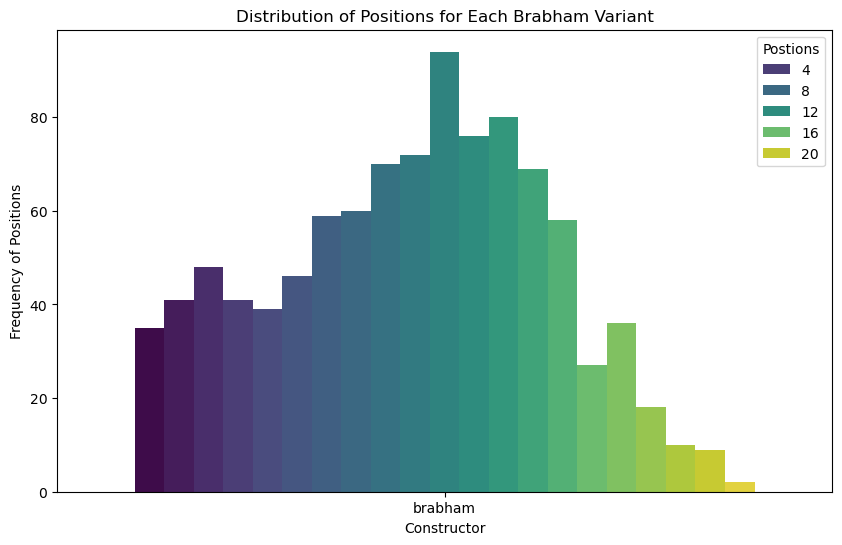

In [17]:
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=brabham_results, x='constructorRecent', hue='position', palette='viridis')

# Add titles and labels
plt.title('Distribution of Positions for Each Brabham Variant')
plt.xlabel('Constructor')
plt.ylabel('Frequency of Positions')

# Show the plot
plt.legend(title='Postions')
plt.show()

/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

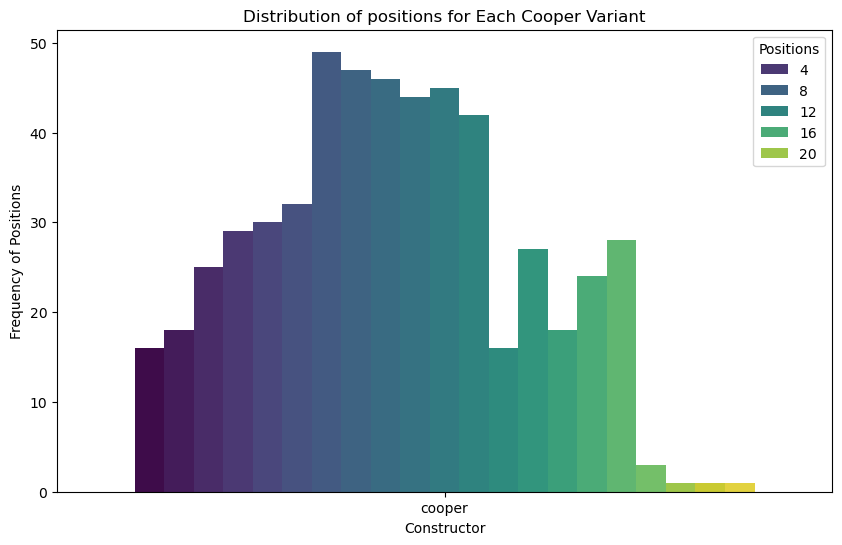

In [18]:
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=cooper_results, x='constructorRecent', hue='position', palette='viridis')

# Add titles and labels
plt.title('Distribution of positions for Each Cooper Variant')
plt.xlabel('Constructor')
plt.ylabel('Frequency of Positions')

# Show the plot
plt.legend(title='Positions')
plt.show()

/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

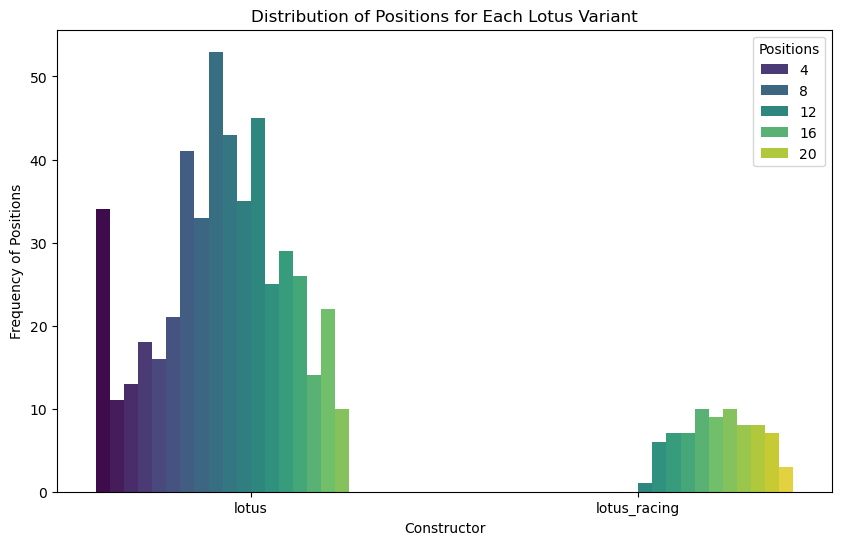

In [19]:
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=lotus_results, x='constructorRecent', hue='position', palette='viridis')

# Add titles and labels
plt.title('Distribution of Positions for Each Lotus Variant')
plt.xlabel('Constructor')
plt.ylabel('Frequency of Positions')

# Show the plot
plt.legend(title='Positions')
plt.show()

/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/elizakimball/micromamba/envs/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

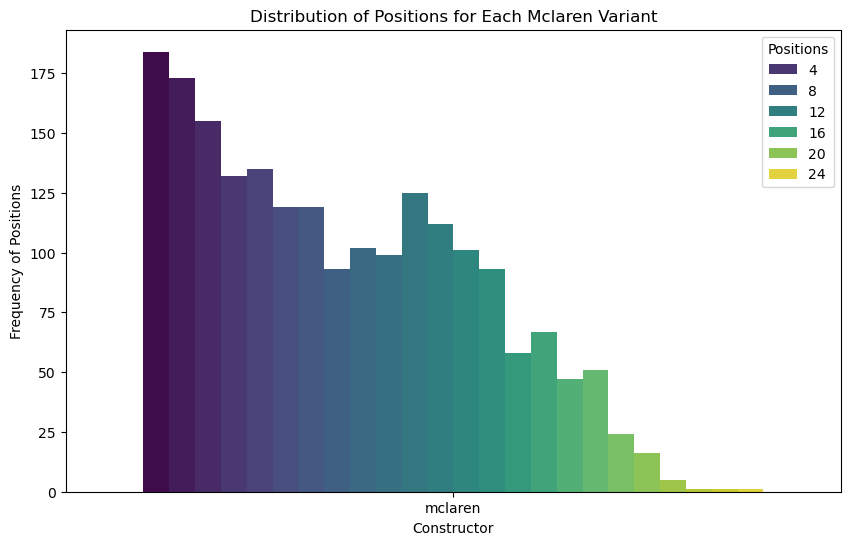

In [20]:
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=mclaren_results, x='constructorRecent', hue='position', palette='viridis')

# Add titles and labels
plt.title('Distribution of Positions for Each Mclaren Variant')
plt.xlabel('Constructor')
plt.ylabel('Frequency of Positions')

# Show the plot
plt.legend(title='Positions')
plt.show()

In [21]:
# remove engine from name in constructorRecent
results['constructorRecent'] = results['constructorRecent'].str.split('-').str[0]
results = results.drop('constructorRef', axis=1)
results['constructorRecent'].unique()

array(['mclaren', 'sauber', 'williams', 'alpine', 'rb', 'ferrari',
       'toyota', 'super_aguri', 'red_bull', 'aston_martin', 'mercedes',
       'mf1', 'spyker_mf1', 'arrows', 'prost', 'lola', 'ligier',
       'footwork', 'forti', 'pacific', 'simtek', 'team_lotus',
       'larrousse', 'brabham', 'dallara', 'fondmetal', 'march', 'moda',
       'lambo', 'ags', 'leyton', 'coloni', 'eurobrun', 'osella', 'onyx',
       'life', 'rial', 'zakspeed', 'ram', 'spirit', 'ats', 'theodore',
       'fittipaldi', 'ensign', 'shadow', 'wolf', 'merzario', 'kauhsen',
       'rebaque', 'surtees', 'hesketh', 'martini', 'brm', 'penske', 'lec',
       'mcguire', 'boro', 'apollon', 'kojima', 'parnelli', 'maki', 'hill',
       'lyncar', 'iso_marlboro', 'trojan', 'amon', 'token', 'tecno',
       'matra', 'politoys', 'connew', 'lotus', 'bellasi', 'tomaso',
       'cooper', 'eagle', 'lds', 'protos', 'shannon', 're', 'brp',
       'scirocco', 'porsche', 'derrington', 'gilby', 'de_tomaso',
       'stebro', 'emeryso

In [22]:
final_results_data = results
final_results_data.to_csv('final_results_data.csv', index=False)

final_results_data

,resultId,raceId,year,position,driverId,driverRef,constructorId,constructorRecent
0,1,18,2008,1.0,1,hamilton,1,mclaren
1,2,18,2008,2.0,2,heidfeld,2,sauber
2,3,18,2008,3.0,3,rosberg,3,williams
3,4,18,2008,4.0,4,alonso,4,alpine
4,5,18,2008,5.0,5,kovalainen,1,mclaren
...,...,...,...,...,...,...,...,...
26514,26520,1132,2024,16.0,839,ocon,214,alpine
26515,26521,1132,2024,17.0,815,perez,9,red_bull
26516,26522,1132,2024,18.0,855,zhou,15,sauber
26517,26523,1132,2024,19.0,847,russell,131,mercedes


In [23]:
# Add eras to race and results dataframe
def determine_era(year):
    if year <= 1966:
        return "Classic Era"
    elif 1967 <= year <= 1976:
        return "The Cosworth Revolution"
    elif 1977 <= year <= 1988:
        return "Turbo Era"
    elif 1989 <= year <= 2005:
        return "V10 Era"
    elif 2006 <= year <= 2013:
        return "V8 Era"
    elif 2014 <= year <= 2021:
        return "Hybrid Era"
    else:
        return "Turbo Hybrid Era"

# Add eras to race DataFrame
if 'era' not in races.columns:
    races['era'] = races['year'].apply(determine_era)
    # Adjust column order to place 'era' after 'year'
    col_order = ['year', 'era'] + [col for col in races.columns if col not in ['year', 'era']]
    races = races[col_order]
else:
    print("Column 'era' already exists in the races DataFrame.")

# Ensure 'raceId' is included for a more accurate merge
if 'raceId' in races.columns and 'raceId' in results.columns:
    results = results.merge(races[['raceId', 'year', 'era']], on=['raceId', 'year'], how='left')
else:
    # Fall back to merging by year if raceId is not available
    results = results.merge(races[['year', 'era']].drop_duplicates(), on='year', how='left')

# # add eras to race df
# if 'era' not in races.columns:
#     races['era'] = races['year'].apply(determine_era)
#     # Optional: Adjust the column order to place 'era' right after 'year'
#     cols = list(races.columns)
#     year_id_index = cols.index('year')
#     cols.insert(year_id_index + 1, cols.pop(cols.index('era')))
#     races = races[cols]
# else:
#     # If 'era' is already present, print a message or handle as needed
#     print("Column 'era' already exists in the races DataFrame.")

# # merge eras from race df to results df
# if 'era' not in results.columns:
#     # Perform the merge if 'year' is not present
#     results = results.merge(races[['year', 'era']], on='year', how='left')
#     # Optional: Adjust the column order to place 'year' right after 'raceId'
#     cols = list(results.columns)
#     year_id_index = cols.index('year')
#     cols.insert(year_id_index + 1, cols.pop(cols.index('era')))
#     results = results[cols]
# else:
#     # If 'year' is already present, print a message or handle as needed
#     print("Column 'era' already exists in the DataFrame.")

results

,resultId,raceId,year,position,driverId,driverRef,constructorId,constructorRecent,era
0,1,18,2008,1.0,1,hamilton,1,mclaren,V8 Era
1,2,18,2008,2.0,2,heidfeld,2,sauber,V8 Era
2,3,18,2008,3.0,3,rosberg,3,williams,V8 Era
3,4,18,2008,4.0,4,alonso,4,alpine,V8 Era
4,5,18,2008,5.0,5,kovalainen,1,mclaren,V8 Era
...,...,...,...,...,...,...,...,...,...
26514,26520,1132,2024,16.0,839,ocon,214,alpine,Turbo Hybrid Era
26515,26521,1132,2024,17.0,815,perez,9,red_bull,Turbo Hybrid Era
26516,26522,1132,2024,18.0,855,zhou,15,sauber,Turbo Hybrid Era
26517,26523,1132,2024,19.0,847,russell,131,mercedes,Turbo Hybrid Era


In [24]:
constructors_2024 = list(team_mapping_name_change.keys())
constructors_2024_results = results[results['constructorRecent'].isin(constructors_2024)]

drivers_2024 = constructors_2024_results[constructors_2024_results['year'] == 2024]['driverRef'].unique()
drivers_2024_results = results[results['driverRef'].isin(drivers_2024)]

constructors_2024_results[constructors_2024_results['year'] == 2022]

,resultId,raceId,year,position,driverId,driverRef,constructorId,constructorRecent,era
25400,25406,1074,2022,1.0,844,leclerc,6,ferrari,Turbo Hybrid Era
25401,25407,1074,2022,2.0,832,sainz,6,ferrari,Turbo Hybrid Era
25402,25408,1074,2022,3.0,1,hamilton,131,mercedes,Turbo Hybrid Era
25403,25409,1074,2022,4.0,847,russell,131,mercedes,Turbo Hybrid Era
25404,25410,1074,2022,5.0,825,kevin_magnussen,210,haas,Turbo Hybrid Era
...,...,...,...,...,...,...,...,...,...
25835,25841,1096,2022,16.0,854,mick_schumacher,210,haas,Turbo Hybrid Era
25836,25842,1096,2022,17.0,825,kevin_magnussen,210,haas,Turbo Hybrid Era
25837,25843,1096,2022,18.0,1,hamilton,131,mercedes,Turbo Hybrid Era
25838,25844,1096,2022,19.0,849,latifi,3,williams,Turbo Hybrid Era


## Hamilton vs. Verstappen Graphs

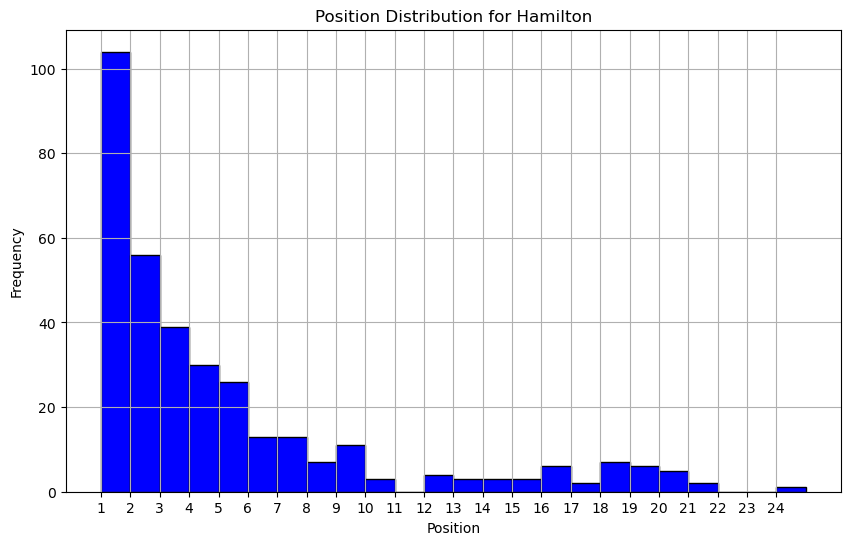

In [25]:
driver_name = 'hamilton'

# Filter the DataFrame for the selected driver
driver_data = constructors_2024_results[constructors_2024_results['driverRef'] == driver_name]

# Create a histogram of their positions
plt.figure(figsize=(10, 6))
plt.hist(driver_data['position'].dropna(), bins=range(1, int(driver_data['position'].max()) + 2), edgecolor='black', color='blue')
plt.title(f'Position Distribution for {driver_name.title()}')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(range(1, int(driver_data['position'].max()) + 1))
plt.grid(True)
plt.show()

In [26]:
verstappen_drivers = constructors_2024_results[constructors_2024_results['driverRef'].str.contains('verstappen', case=False, na=False)]

# Display the unique driverRef values that match
verstappen_driver_refs = verstappen_drivers['driverRef'].unique()

print(verstappen_driver_refs)

['verstappen' 'max_verstappen']


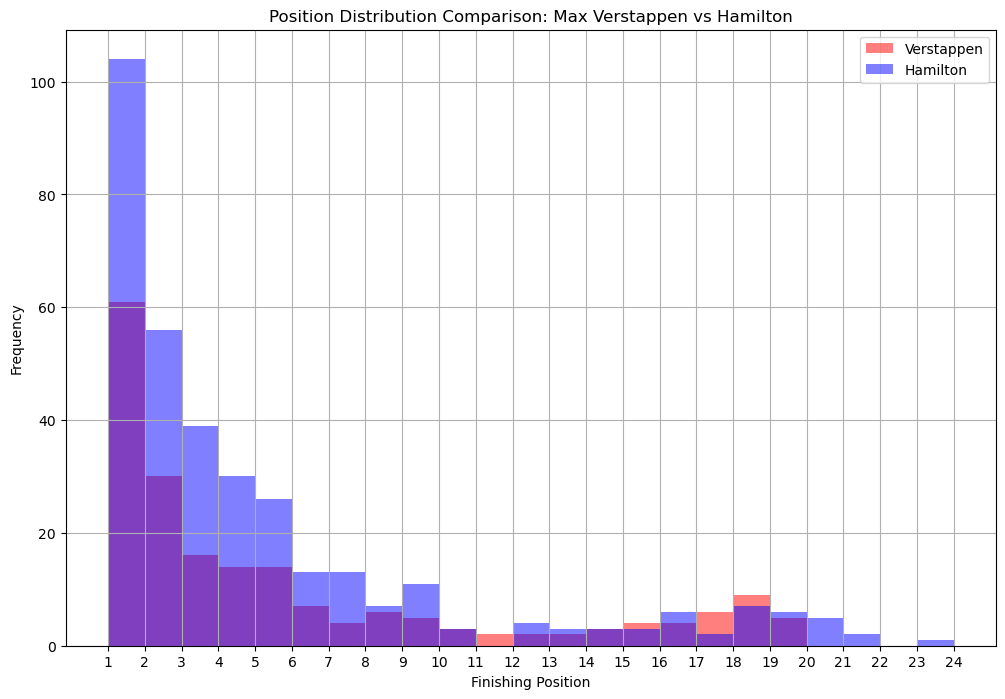

NameError: name 'current_constructors_results' is not defined

In [27]:
# Filter data for Verstappen and Hamilton
data_verstappen = constructors_2024_results[constructors_2024_results['driverRef'] == 'max_verstappen']['position'].dropna()
data_hamilton = constructors_2024_results[constructors_2024_results['driverRef'] == 'hamilton']['position'].dropna()

# Define the range of positions to include all possible finishing positions
bins = np.linspace(1, max(data_verstappen.max(), data_hamilton.max()), int(max(data_verstappen.max(), data_hamilton.max())))

# Create histograms
plt.figure(figsize=(12, 8))
plt.hist(data_verstappen, bins=bins, alpha=0.5, label='Verstappen', color='red')
plt.hist(data_hamilton, bins=bins, alpha=0.5, label='Hamilton', color='blue')

# Adding titles and labels
plt.title('Position Distribution Comparison: Max Verstappen vs Hamilton')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, max(data_verstappen.max(), data_hamilton.max())+1))
plt.legend()
plt.grid(True)
plt.show()

data_verstappen = current_constructors_results[current_constructors_results['driverRef'] == 'max_verstappen']['position'].dropna()
data_hamilton = current_constructors_results[current_constructors_results['driverRef'] == 'hamilton']['position'].dropna()

# Define the range of positions to include all possible finishing positions
bins = np.linspace(1, max(data_verstappen.max(), data_hamilton.max()), int(max(data_verstappen.max(), data_hamilton.max())))

# Create histograms with normalization
plt.figure(figsize=(12, 8))
plt.hist(data_verstappen, bins=bins, alpha=0.5, label='Verstappen', color='red', density=True)
plt.hist(data_hamilton, bins=bins, alpha=0.5, label='Hamilton', color='blue', density=True)

# Adding titles and labels
plt.title('Normalized Position Distribution Comparison: Max Verstappen vs Hamilton')
plt.xlabel('Finishing Position')
plt.ylabel('Probability Density')
plt.xticks(np.arange(1, max(data_verstappen.max(), data_hamilton.max())+1))
plt.legend()
plt.grid(True)
plt.show()

## Visualizing Driver Skills

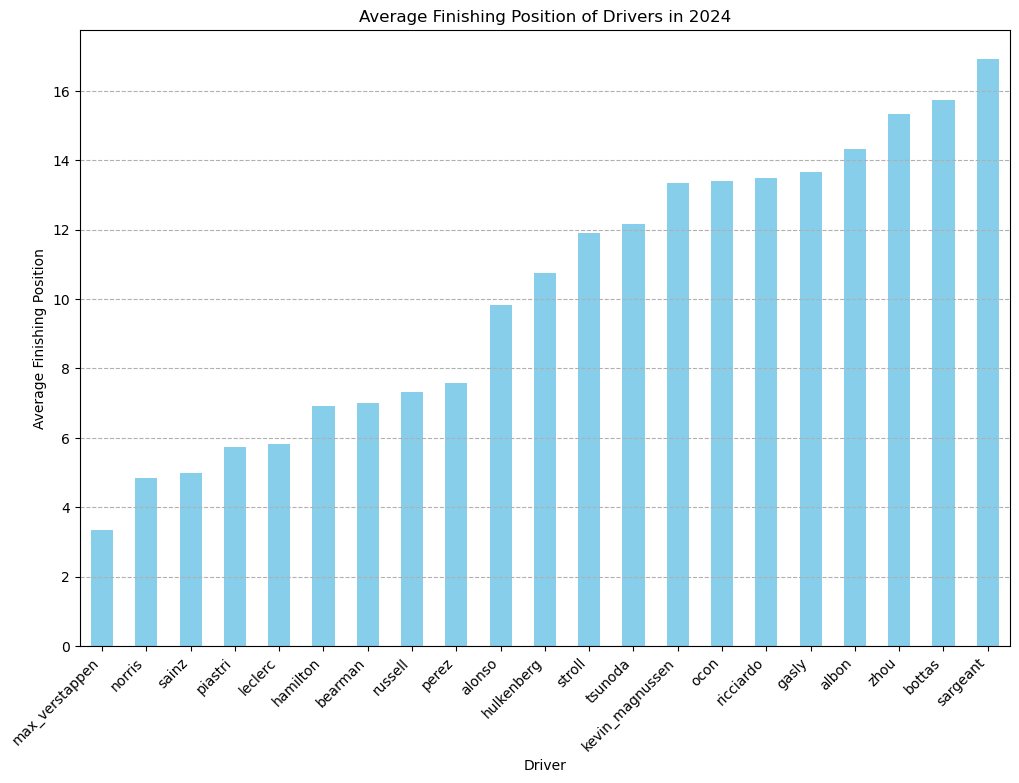

In [698]:
# Bar chart of average finishing positions of all drivers from 2024

# Filter the 2024 data
drivers_2024_data = constructors_2024_results[constructors_2024_results['year'] == 2024]

# Calculate average finishing position for each driver
avg_positions = drivers_2024_data.groupby('driverRef')['position'].mean()

# Plot average finishing positions
plt.figure(figsize=(12, 8))
avg_positions.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Finishing Position of Drivers in 2024')
plt.xlabel('Driver')
plt.ylabel('Average Finishing Position')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


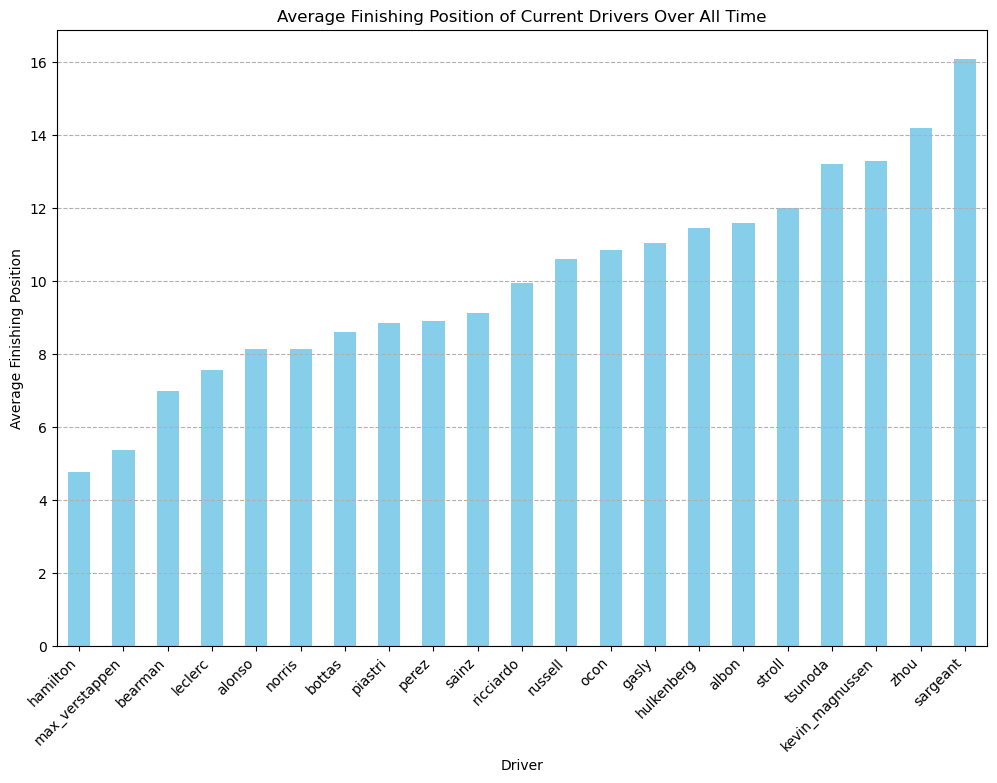

In [699]:
# Bar chart of average finishing positions of drivers all time


# Calculate average finishing position for each driver
avg_positions = drivers_2024_results.groupby('driverRef')['position'].mean()

# Plot average finishing positions
plt.figure(figsize=(12, 8))
avg_positions.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Finishing Position of Current Drivers Over All Time')
plt.xlabel('Driver')
plt.ylabel('Average Finishing Position')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


## Graphs showing driver skill change over time

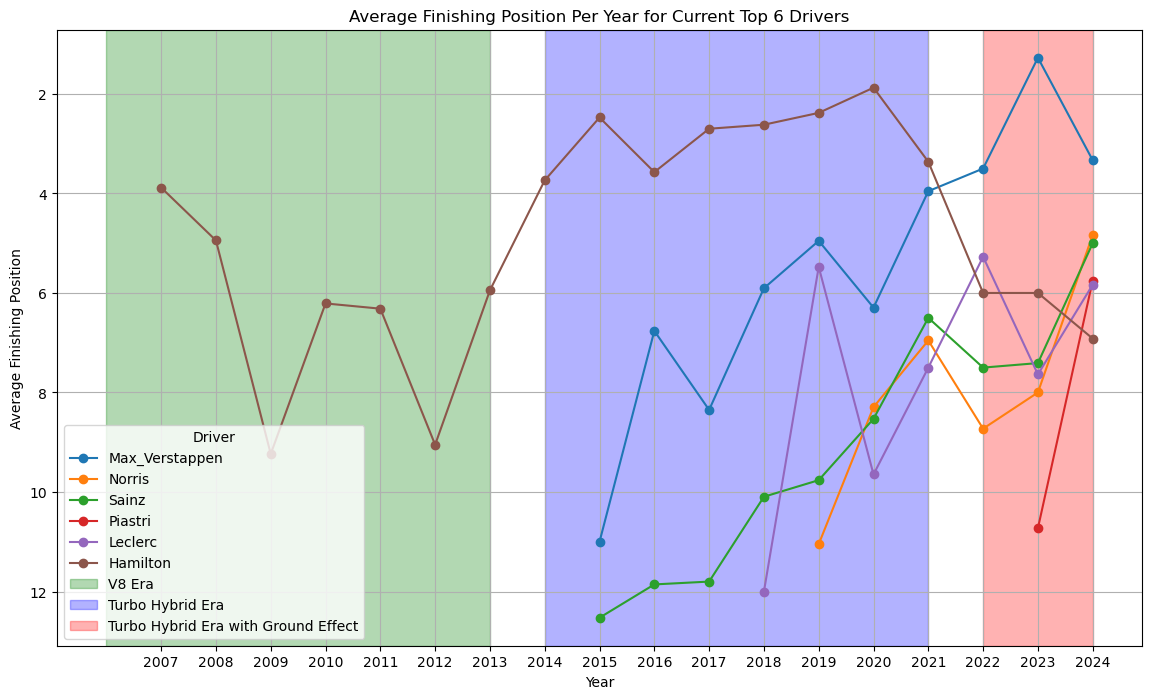

In [736]:
# Filter data for the top 6 drivers in 2024
top_6_drivers_2024 = ['max_verstappen', 'norris', 'sainz', 'piastri', 'leclerc', 'hamilton']
top_6_data = drivers_2024_results[drivers_2024_results['driverRef'].isin(top_6_drivers_2024)]

# Sort data by raceId for a proper timeline
top_6_data = top_6_data.sort_values(by='raceId')

avg_positions_per_year = top_6_data.groupby(['year', 'driverRef'])['position'].mean().reset_index()

# Create a line plot for each driver
plt.figure(figsize=(14, 8))
for driver in top_6_drivers_2024:
    driver_data = avg_positions_per_year[avg_positions_per_year['driverRef'] == driver]
    plt.plot(driver_data['year'], driver_data['position'], marker='o', linestyle='-', label=driver.title())

# Color code the background for different F1 eras
plt.axvspan(2006, 2013, color='green', alpha=0.3, label='V8 Era')
plt.axvspan(2014, 2021, color='blue', alpha=0.3, label='Turbo Hybrid Era')
plt.axvspan(2022, 2024, color='red', alpha=0.3, label='Turbo Hybrid Era with Ground Effect')  # Update end year as needed



# Customize the plot
plt.title('Average Finishing Position Per Year for Current Top 6 Drivers')
plt.xlabel('Year')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis because lower position numbers are better
plt.xticks(driver_data['year'].unique())  # Assuming the years are unique and correctly formatted
plt.legend(title='Driver')
plt.grid(True)
plt.show()


## Graphs showing constructor skill change over eras

In [701]:
avg_positions_per_era = constructors_2024_results.groupby(['era', 'constructorRecent'])['position'].mean().reset_index()
avg_positions_per_era

,era,constructorRecent,position
0,Classic Era,aston_martin,10.862745
1,Classic Era,ferrari,6.822891
2,Classic Era,mclaren,6.200000
3,Classic Era,mercedes,7.110092
4,Classic Era,sauber,5.958937
5,Hybrid Era,alpine,11.878030
6,Hybrid Era,aston_martin,10.214730
7,Hybrid Era,ferrari,6.608919
8,Hybrid Era,haas,14.038662
9,Hybrid Era,mclaren,10.949037


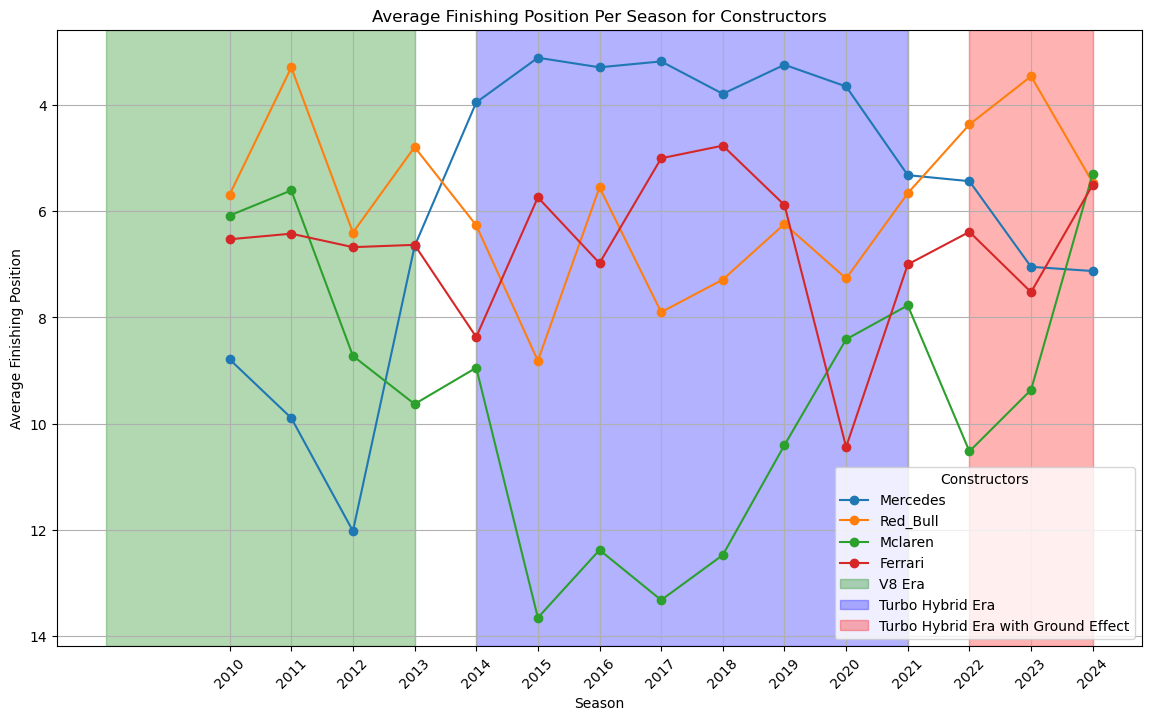

,year,era
296954,2010,V8 Era
305618,2011,V8 Era
314225,2012,V8 Era
323825,2013,V8 Era
331767,2014,Hybrid Era
339500,2015,Hybrid Era
346682,2016,Hybrid Era
356384,2017,Hybrid Era
364441,2018,Hybrid Era
373261,2019,Hybrid Era


In [737]:
filtered_data = constructors_2024_results[constructors_2024_results['year'] >= 2010]

avg_positions_per_year = filtered_data.groupby(['year', 'constructorRecent'])['position'].mean().reset_index()

avg_positions_per_year = avg_positions_per_year.sort_values(by='year')

avg_positions_per_year = avg_positions_per_year[['year', 'constructorRecent', 'position']]

# Define the list of constructors to plot (assuming constructors_2024 is a list of constructors)
constructors_2024 = ['mercedes', 'red_bull', 'mclaren', 'ferrari']

# Create a line plot for each constructor
plt.figure(figsize=(14, 8))
for constructor in constructors_2024:
    constructor_data = avg_positions_per_year[avg_positions_per_year['constructorRecent'] == constructor]
    plt.plot(constructor_data['year'], constructor_data['position'], marker='o', linestyle='-', label=constructor.title())

# Color code the background for different F1 eras
#plt.axvspan(1995, 2005, color='yellow', alpha=0.3, label='V10 Era')
plt.axvspan(2008, 2013, color='green', alpha=0.3, label='V8 Era')
plt.axvspan(2014, 2021, color='blue', alpha=0.3, label='Turbo Hybrid Era')
plt.axvspan(2022, 2024, color='red', alpha=0.3, label='Turbo Hybrid Era with Ground Effect')  # Update end year as needed


# Customize the plot
plt.title('Average Finishing Position Per Season for Constructors')
plt.xlabel('Season')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis because lower position numbers are better
plt.xticks(sorted(avg_positions_per_year['year'].unique()), rotation=45)  # Rotate x-tick labels for better readability
plt.legend(title='Constructors')
plt.grid(True)
plt.show()

filtered_data.loc[:, ['year', 'era']].drop_duplicates()


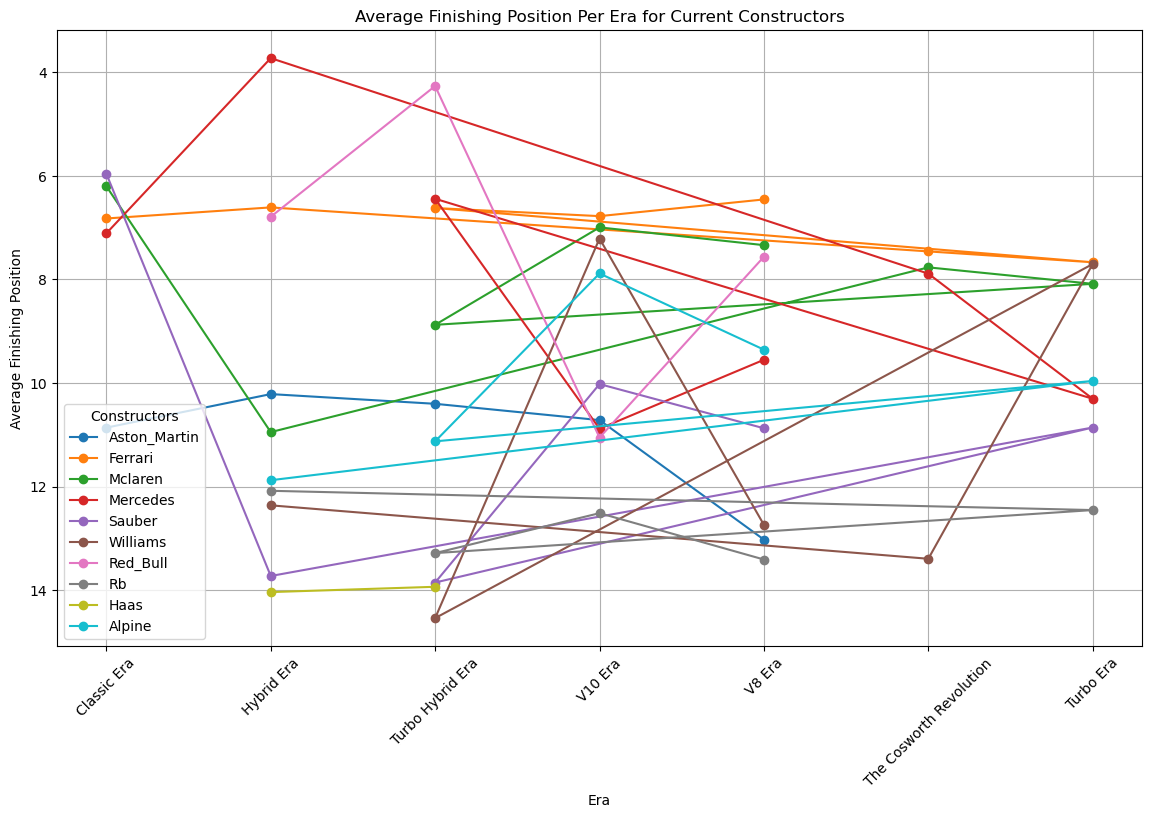

,era,constructorRecent,position
0,Classic Era,aston_martin,10.862745
1,Classic Era,ferrari,6.822891
2,Classic Era,mclaren,6.200000
3,Classic Era,mercedes,7.110092
4,Classic Era,sauber,5.958937
14,Hybrid Era,williams,12.363114
13,Hybrid Era,sauber,13.727781
12,Hybrid Era,red_bull,6.790709
11,Hybrid Era,rb,12.082349
10,Hybrid Era,mercedes,3.726072


In [703]:
# to finish here!!!
avg_positions_per_era = constructors_2024_results.groupby(['era', 'constructorRecent'])['position'].mean().reset_index()

avg_positions_per_era = avg_positions_per_era.sort_values(by='era')

avg_positions_per_era = avg_positions_per_era[['era', 'constructorRecent', 'position']]

# Define the list of constructors to plot (assuming constructors_2024 is a list of constructors)
constructors_2024 = avg_positions_per_era['constructorRecent'].unique()

# Create a line plot for each constructor
plt.figure(figsize=(14, 8))
for constructor in constructors_2024:
    constructor_data = avg_positions_per_era[avg_positions_per_era['constructorRecent'] == constructor]
    plt.plot(constructor_data['era'], constructor_data['position'], marker='o', linestyle='-', label=constructor.title())

# Customize the plot
plt.title('Average Finishing Position Per Era for Current Constructors')
plt.xlabel('Era')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Invert y-axis because lower position numbers are better
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.legend(title='Constructors')
plt.grid(True)
plt.show()

avg_positions_per_era


## Graphs showing driver skill on different types of tracks

In [704]:
races

,raceId,year,era,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,V8 Era,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,V8 Era,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,V8 Era,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,V8 Era,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,V8 Era,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,Turbo Hybrid Era,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,Turbo Hybrid Era,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,Turbo Hybrid Era,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,Turbo Hybrid Era,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


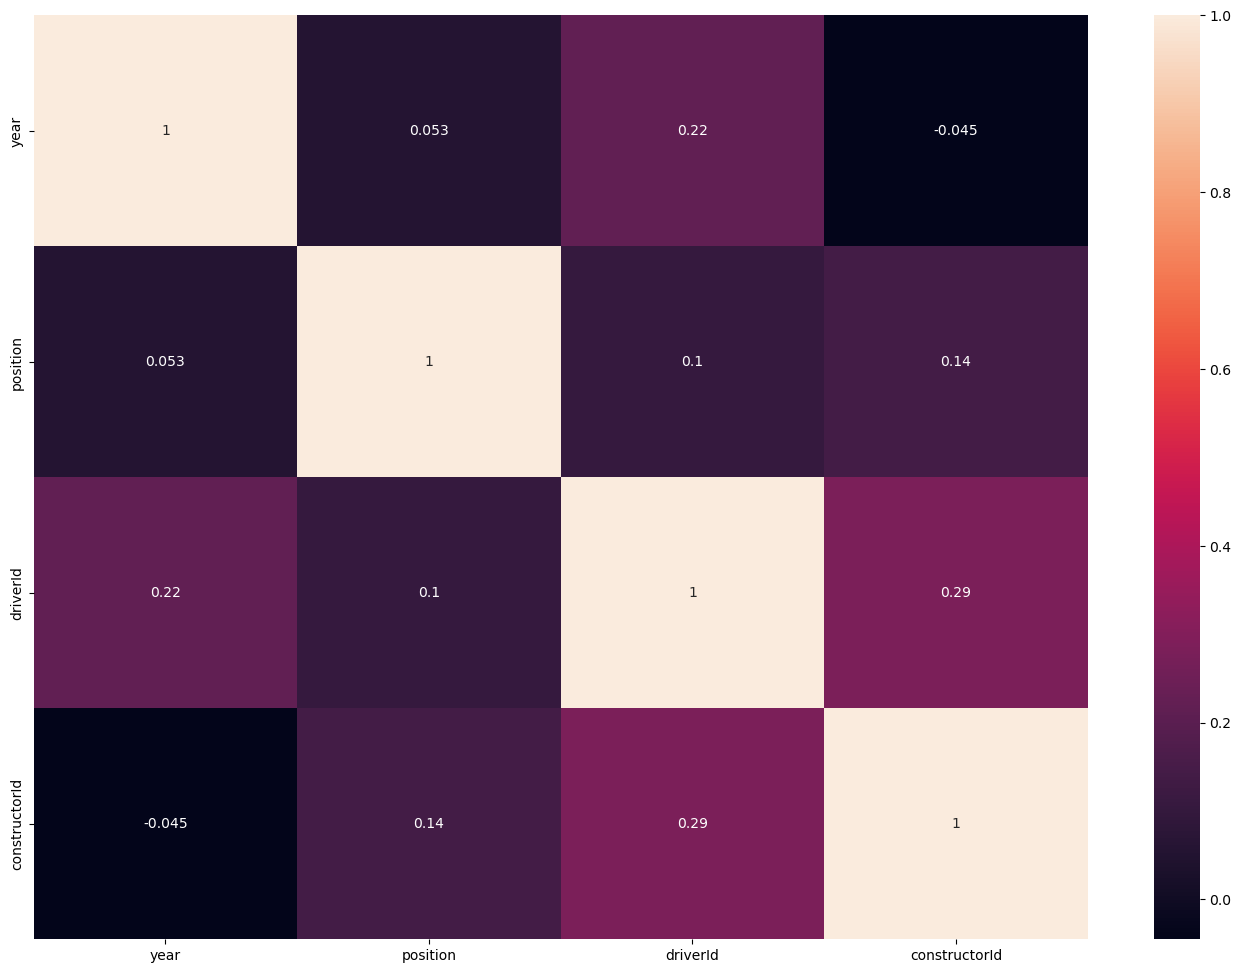

In [734]:
heatmap_data = results[['year', 'position', 'driverId', 'constructorId']]
plt.figure(figsize=(17,12))
sns.heatmap(heatmap_data.corr(),annot=True)
plt.show()

In [27]:
final_results_data = 

,resultId,raceId,year,era,position,driverId,driverRef,constructorId,constructorRecent
0,1,18,2008,V8 Era,1.0,1,hamilton,1,mclaren
1,1,18,2008,V8 Era,1.0,1,hamilton,1,mclaren
2,1,18,2008,V8 Era,1.0,1,hamilton,1,mclaren
3,1,18,2008,V8 Era,1.0,1,hamilton,1,mclaren
4,1,18,2008,V8 Era,1.0,1,hamilton,1,mclaren
...,...,...,...,...,...,...,...,...,...
422661,26524,1132,2024,Turbo Hybrid Era,19.0,842,gasly,214,alpine
422662,26524,1132,2024,Turbo Hybrid Era,19.0,842,gasly,214,alpine
422663,26524,1132,2024,Turbo Hybrid Era,19.0,842,gasly,214,alpine
422664,26524,1132,2024,Turbo Hybrid Era,19.0,842,gasly,214,alpine


## Combining datasets

In [705]:
# con1 = pd.merge(result_df, races_df, on ='raceId')
# con2 = pd.merge(con1, drivers_df, on = 'driverId')
# con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
# con4 = pd.merge(con3, constructor_df, on ='constructorId')
# df = pd.merge(con4, stats_df, on ='statusId')
# pd.get_option("display.max_columns",None)
# df.head()